BL.EN.U4AIE21008


Amal Krishna K

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the 
amplitude part of the spectral components and observe it. 

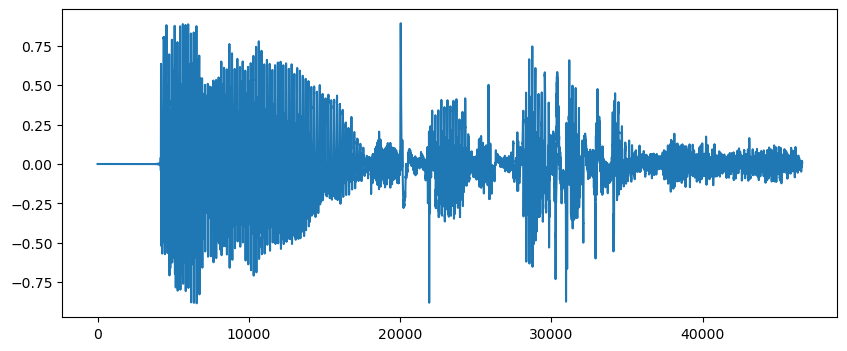

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
y,sr = librosa.load(r"E:\AI in Speech\Lab\Lab1\Lab1\audio.mp3")
plt.figure(figsize=(10,4))
plt.plot(y)

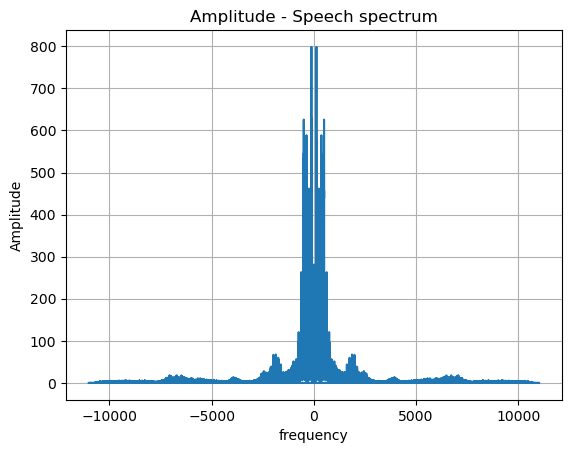

In [5]:
ffts = np.fft.fft(y)
amplitudes = np.abs(ffts)
frequencies = np.fft.fftfreq(len(y), d=1.0 / sr)
plt.plot(frequencies, amplitudes)  
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("Amplitude - Speech spectrum")
plt.grid(True)
plt.show()

A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal 
from frequency domain to time domain. Compare the generated time domain signal with the 
original signal. 

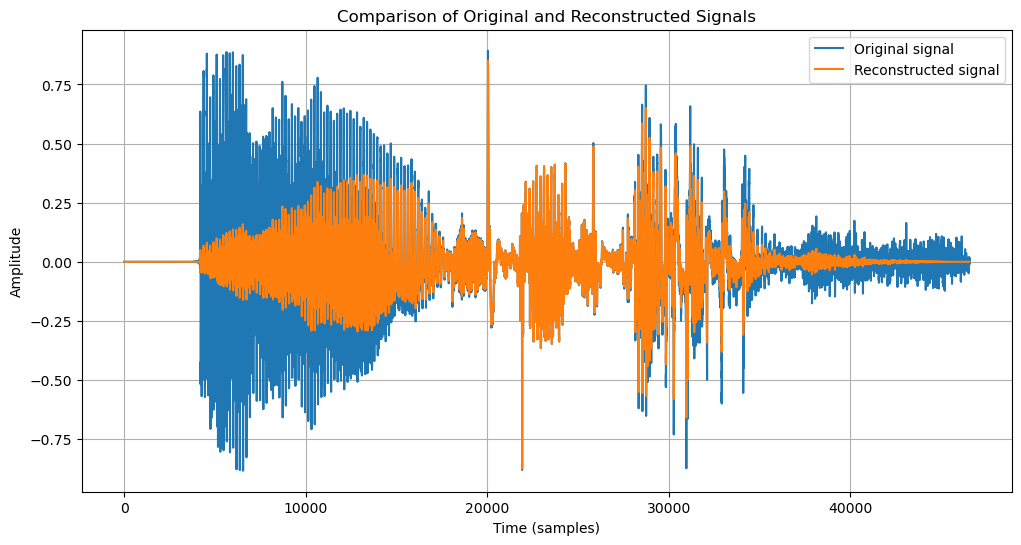

Mean squared error: 0.011200309557020095
Peak error: 0.7998744913088085


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

speech_signal, sample_rate = librosa.load(r"E:\AI in Speech\Lab\Lab1\Lab1\audio.mp3")
window = np.hanning(len(speech_signal))
speech_signal_windowed = speech_signal * window
fft_result = np.fft.fft(speech_signal_windowed)
inversed_signal = np.fft.ifft(fft_result)

plt.figure(figsize=(12, 6))
plt.plot(speech_signal[:len(inversed_signal)], label='Original signal')
plt.plot(np.real(inversed_signal), label='Reconstructed signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Comparison of Original and Reconstructed Signals')
plt.legend()
plt.grid(True)
plt.show()
error = np.abs(speech_signal[:len(inversed_signal)] - np.real(inversed_signal))
print(f"Mean squared error: {np.mean(error**2)}")
print(f"Peak error: {np.max(error)}")

A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum 
with the spectrum of the full signal.

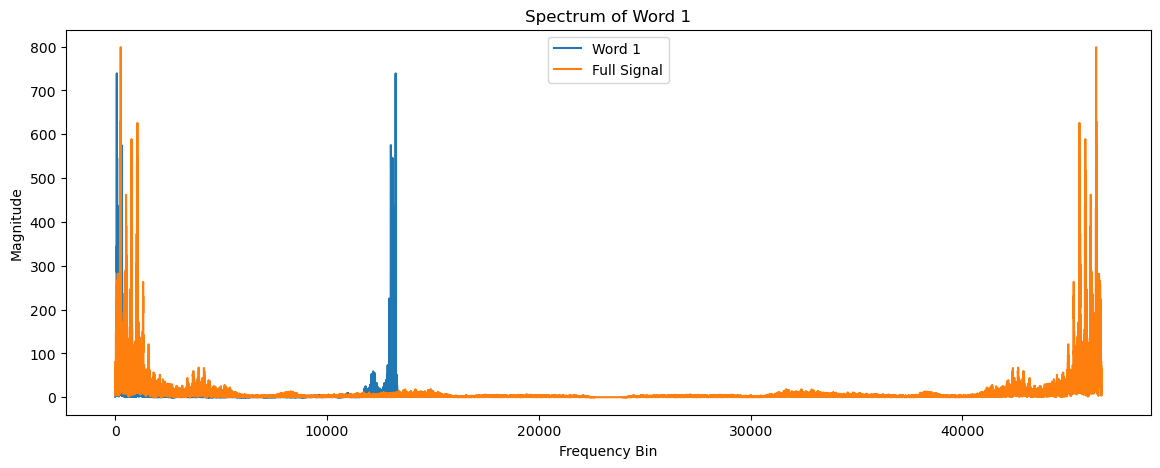

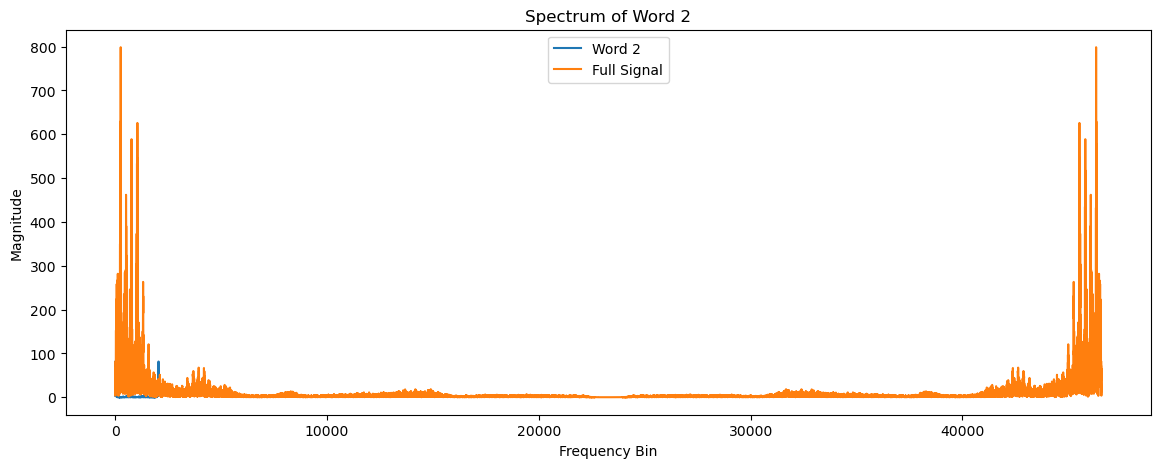

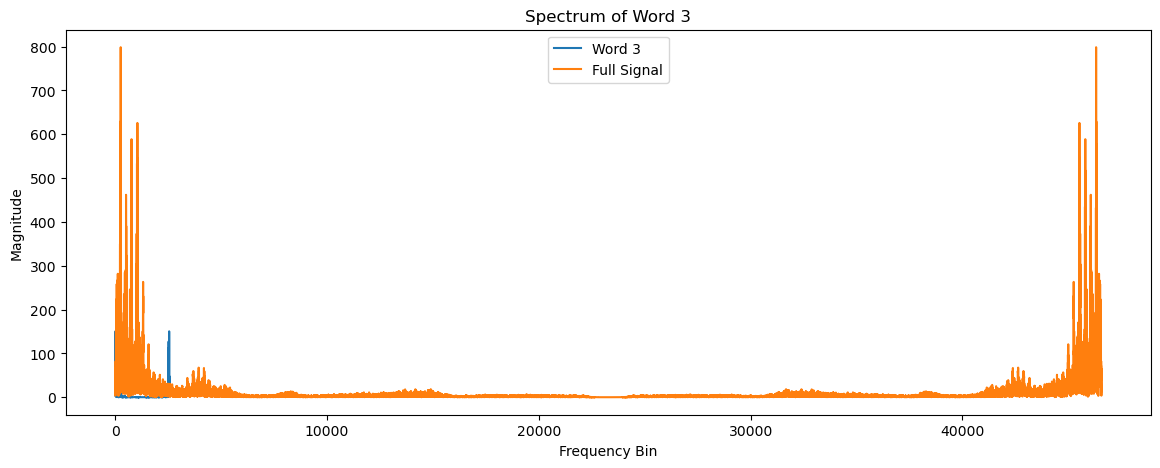

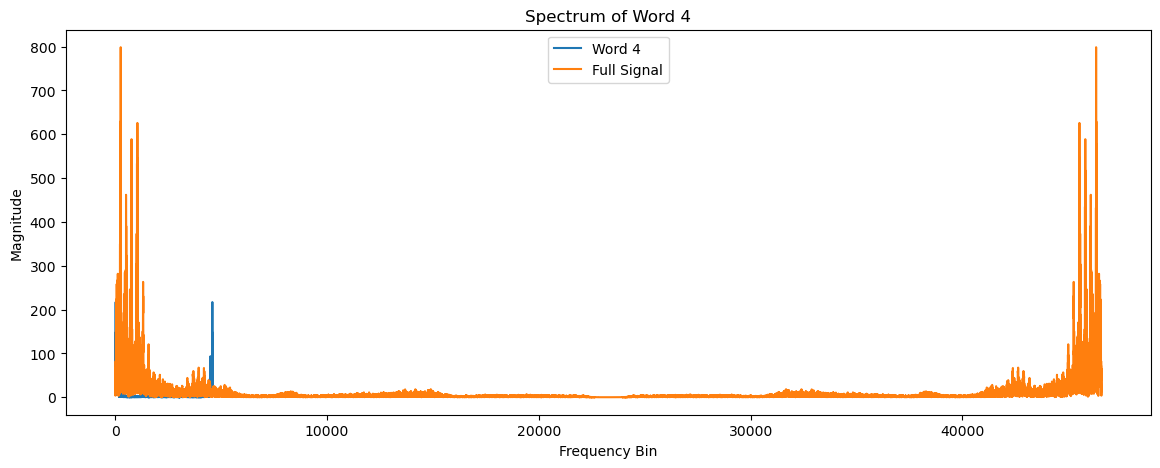

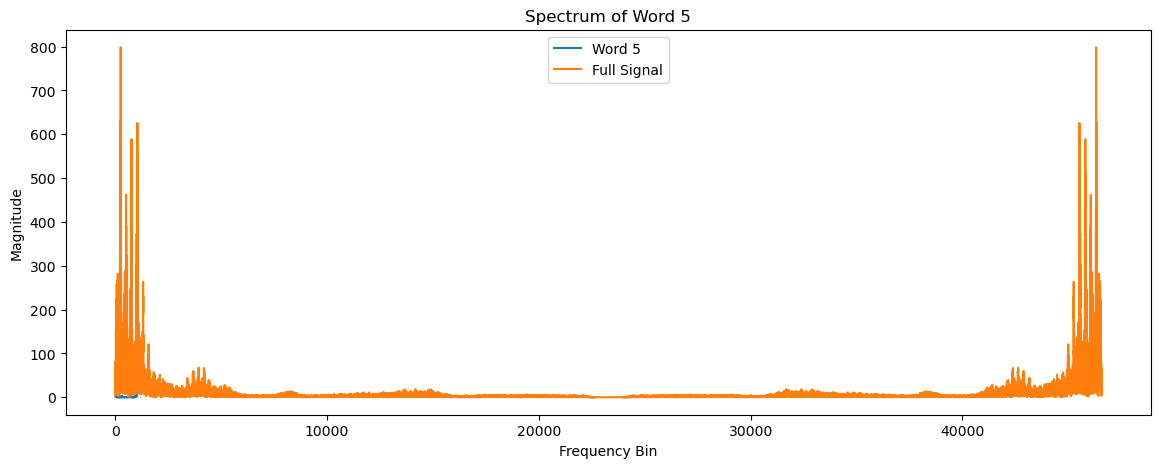

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

audio_file = r"E:\AI in Speech\Lab\Lab1\Lab1\audio.mp3"
speech_signal, sample_rate = librosa.load(audio_file)

threshold = np.percentile(np.abs(speech_signal), 92)
segments = librosa.effects.split(speech_signal, top_db=-20 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = speech_signal[start:end]  
    D_full = np.fft.fft(speech_signal)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}') 
    plt.plot(np.abs(D_full), label='Full Signal') 

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend() 
    plt.show()

A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the 
spectral components. 

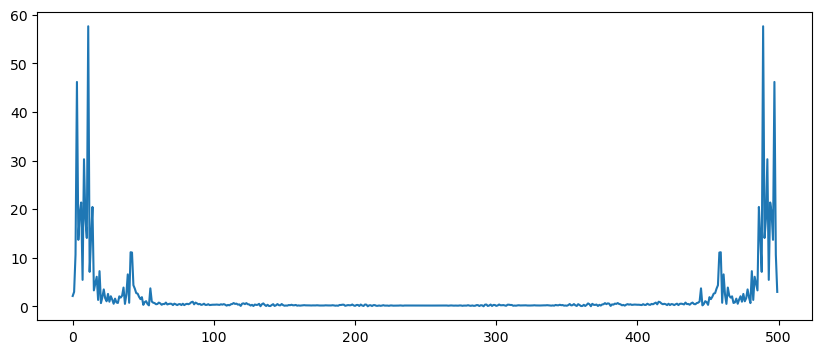

In [32]:
from IPython.display import Audio
Audio(r"E:\AI in Speech\Lab\Lab1\Lab1\audio.mp3")
y,sr = librosa.load(r"E:\AI in Speech\Lab\Lab1\Lab1\audio.mp3",sr = 22500)
Audio(y,rate = sr)

# 1s = 22500
# 20ms 
# x = 500 ( window size )

fft_2 = np.fft.fft(y[10000:10500])
plt.figure(figsize=(10,4))
plt.plot(abs(fft_2))

A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency 
components using numpy.fft.rfft(). Stack these frequency components as columns in a 
matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or 
scipy.signal.stft() as well to achieve this.

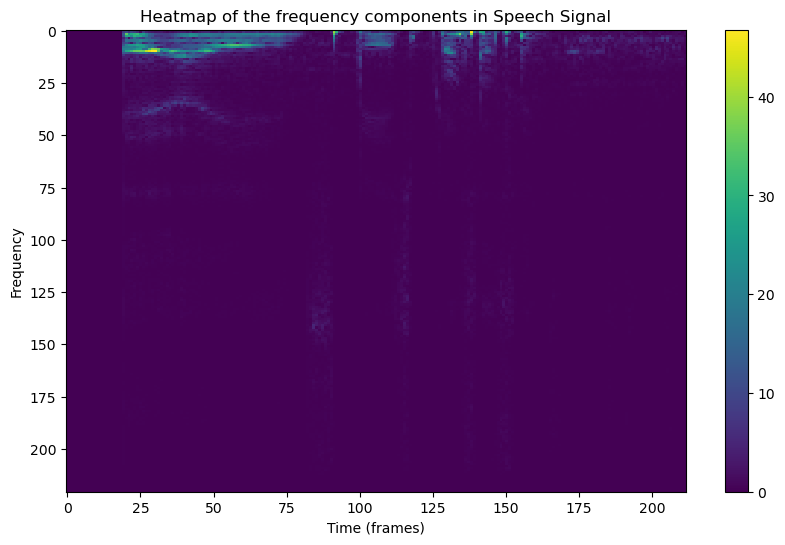

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

speech_signal, sample_rate = librosa.load(r"E:\AI in Speech\Lab\Lab1\Lab1\audio.mp3")
window_size = 0.02   # 20mSec
window_length = int(window_size * sample_rate)
hop_size = window_length // 2
stft_matrix = librosa.stft(speech_signal, n_fft=window_length, hop_length=hop_size)
stft_mag = np.abs(stft_matrix)
plt.figure(figsize=(10, 6))
plt.imshow(stft_mag, aspect='auto', interpolation='nearest')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency')
plt.title('Heatmap of the frequency components in Speech Signal')
plt.colorbar()
plt.show()

A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the 
same duration. Compare the plots. 

C:\Users\User\AppData\Local\Temp\ipykernel_5628\3301072791.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spectrogram_matrix), aspect='auto', origin='lower', cmap='viridis')


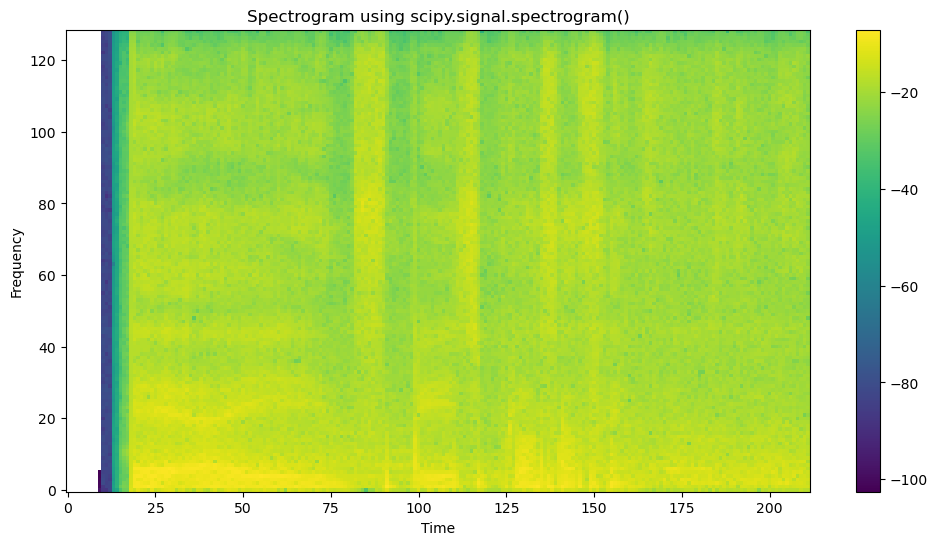

In [50]:
from scipy.signal import spectrogram

frequency_spectogram, time_spectogram, spectrogram_matrix = spectrogram(y,22500)
plt.figure(figsize=(12, 6))
plt.imshow(np.log(spectrogram_matrix), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Spectrogram using scipy.signal.spectrogram()")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()